<a href="https://colab.research.google.com/github/kavya-prabahar/CODSOFT/blob/main/Task%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd
import requests
from io import StringIO

# URL of the dataset on GitHub

url = "https://raw.githubusercontent.com/kavya-prabahar/CODSOFT/main/sales.csv"

response = requests.get(url)
if response.status_code == 200:
    data = StringIO(response.text)
    dataset = pd.read_csv(data)
else:
    print("Failed to download the dataset")



In [ ]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
dataset.shape

(200, 4)

In [ ]:
dataset.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

<ipython-input-11-763081750a1e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["TV"])


<Axes: xlabel='TV', ylabel='Density'>

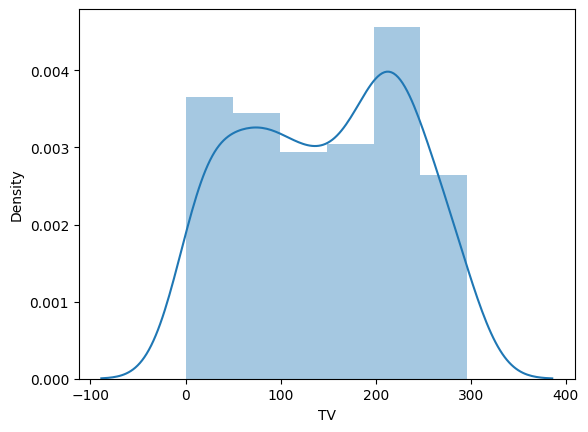

In [ ]:
sns.distplot(dataset["TV"])

<ipython-input-12-a7db366c0f21>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Radio"])


<Axes: xlabel='Radio', ylabel='Density'>

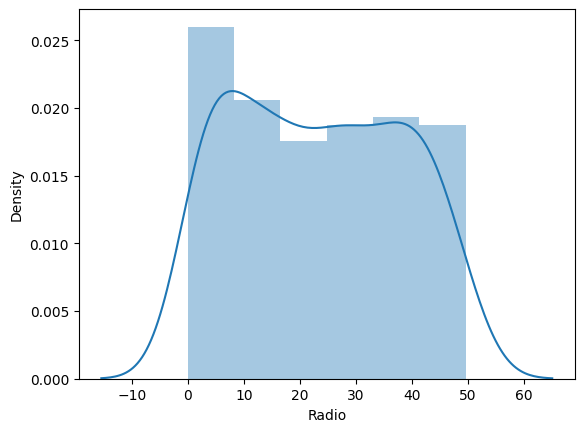

In [ ]:
sns.distplot(dataset["Radio"])

<ipython-input-13-2db2d143c886>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Newspaper"])


<Axes: xlabel='Newspaper', ylabel='Density'>

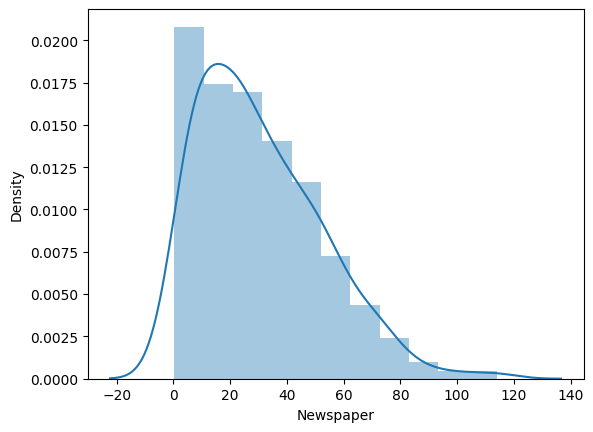

In [ ]:
sns.distplot(dataset["Newspaper"])

In [ ]:
from scipy.stats import boxcox

positive_fare = dataset['Newspaper'] + 1
fare_boxcox, _ = boxcox(positive_fare)

dataset['newspaper'] = fare_boxcox



<ipython-input-15-054e7db53fb4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["newspaper"])


<Axes: xlabel='newspaper', ylabel='Density'>

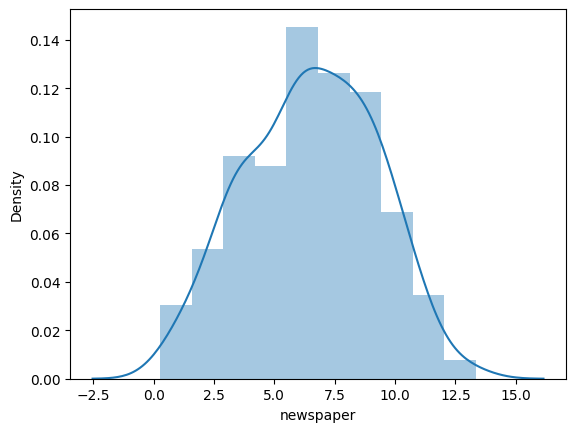

In [ ]:
sns.distplot(dataset["newspaper"])

In [ ]:
dataset=dataset.drop(columns=["Newspaper"])


<ipython-input-17-f17318001466>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Sales"])


<Axes: xlabel='Sales', ylabel='Density'>

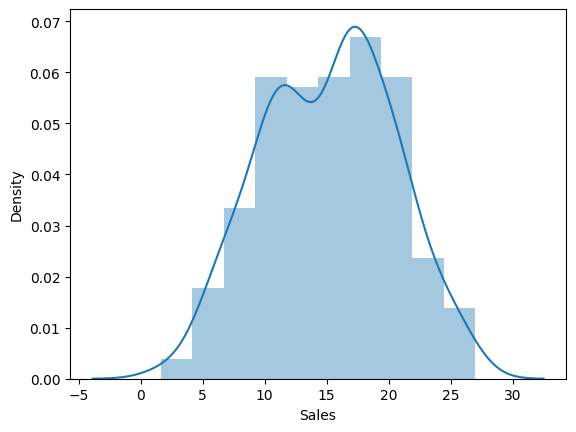

In [ ]:
sns.distplot(dataset["Sales"])

In [ ]:
dataset.isnull().sum()

TV           0
Radio        0
Sales        0
newspaper    0
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols=["TV","Radio","newspaper"]
X=dataset[feature_cols]
Y=dataset.iloc[:, -1]
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=0,train_size=0.75)

In [ ]:
X

,TV,Radio,newspaper
0,230.1,37.8,10.609275
1,44.5,39.3,8.653385
2,17.2,45.9,10.616441
3,151.5,41.3,9.802646
4,180.8,10.8,9.794699
...,...,...,...
195,38.2,3.7,4.695973
196,94.2,4.9,3.459337
197,177.0,9.3,2.998961
198,283.6,42.0,10.391292


In [ ]:
Y

0      10.609275
1       8.653385
2      10.616441
3       9.802646
4       9.794699
         ...    
195     4.695973
196     3.459337
197     2.998961
198    10.391292
199     3.608954
Name: newspaper, Length: 200, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Instantiate the DecisionTreeRegressor
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 0.0904206388836003
Mean Squared Error: 0.043827370681395646
R-squared: 0.9947993422578756


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define the custom scoring function for negative RMSE
def neg_root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return -mse**0.5  # Return negative square root of MSE

# Make a scorer from the custom scoring function
scorer = make_scorer(neg_root_mean_squared_error)

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the DecisionTreeRegressor
model = DecisionTreeRegressor()

# Instantiate GridSearchCV with the model, hyperparameters grid, and custom scorer
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scorer)

# Perform the grid search on the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

rmse = abs(best_score)
print("Root Mean Squared Error (RMSE):", rmse)

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Root Mean Squared Error (RMSE): 0.1503142499896452


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = DecisionTreeRegressor(max_depth= 7, min_samples_leaf= 1, min_samples_split= 2)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

adjusted_r_squared = 1 - (1 - r2) * (200 - 1) / (200 - 3 - 1)
print("Adjusted R-squared:",adjusted_r_squared)

Mean Absolute Error: 0.10840775558980197
Mean Squared Error: 0.083283937915918
R-squared: 0.9901173342187081
Adjusted R-squared: 0.9899660689261373


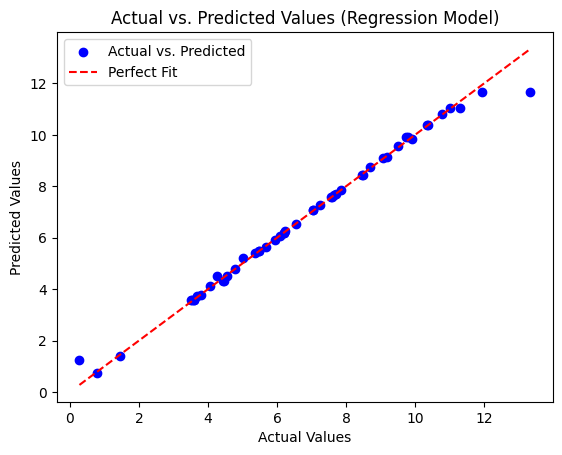

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Regression Model)')
plt.legend()
plt.show()
